In [ ]:
def exception_handler(func):
    def inner_function(*args, **kwargs):
        try:
            func(*args, **kwargs)
        except TypeError:
            print(f"{func.__name__} only takes numbers as the argument")
        except ModuleNotFoundError:
            print("Error not included all libraries")
    return inner_function

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Implementation #1
Item Based Collaborative Filtering

In [ ]:
import pandas as pd
import numpy as np
import re

from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import metrics, preprocessing

In [ ]:
from tensorflow.keras import models, layers, utils

In [ ]:
df_movies = pd.read_csv("/content/drive/MyDrive/data/movies.csv")

In [ ]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [ ]:
df_users = pd.read_csv("/content/drive/MyDrive/data/ratings.csv")

In [ ]:
df_users

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496
...,...,...,...,...
22884372,247753,49530,5.0,1430437962
22884373,247753,69481,3.0,1430437984
22884374,247753,74458,4.0,1430437968
22884375,247753,76093,5.0,1430437811


Data Preprocessing

In [ ]:
df_movies = df_movies.loc[:,["movieId","title"]]

In [ ]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
34203,151697,Grand Slam (1967)
34204,151701,Bloodmoney (2010)
34205,151703,The Butterfly Circus (2009)
34206,151709,Zero (2015)


In [ ]:
df_users = df_users.loc[:,["userId","movieId","rating"]]

In [ ]:
df_users

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0
...,...,...,...
22884372,247753,49530,5.0
22884373,247753,69481,3.0
22884374,247753,74458,4.0
22884375,247753,76093,5.0


In [ ]:
data = pd.merge(df_movies, df_users)

In [ ]:
 data

,movieId,title,userId,rating
0,1,Toy Story (1995),15,4.0
1,1,Toy Story (1995),17,5.0
2,1,Toy Story (1995),23,5.0
3,1,Toy Story (1995),28,4.0
4,1,Toy Story (1995),34,3.0
...,...,...,...,...
22884372,151697,Grand Slam (1967),30758,3.0
22884373,151701,Bloodmoney (2010),172056,4.0
22884374,151703,The Butterfly Circus (2009),172056,5.0
22884375,151709,Zero (2015),172056,3.5


In [ ]:
data = data.iloc[:5000000,:]

In [ ]:
df_data = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")

In [ ]:
df_data

title,"301, 302 (301/302) (1995)",8 Seconds (1994),Above the Rim (1994),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)","Age of Innocence, The (1993)",...,Windows (1980),Wings of Courage (1995),With Honors (1994),Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)","Wooden Man's Bride, The (Yan shen) (1994)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Yankee Zulu (1994),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.shape

(223461, 725)

In [ ]:
df_data.index

Int64Index([     1,      3,      4,      6,      7,      8,      9,     10,
                11,     12,
            ...
            247742, 247745, 247746, 247747, 247748, 247749, 247750, 247751,
            247752, 247753],
           dtype='int64', name='userId', length=223461)

In [ ]:
def return_item_based_recomended(movie_w : str, n_items = None) -> pd.DataFrame:
    movie = df_data[movie_w]
    similar_movies = df_data.corrwith(movie)
    print(similar_movies)
    similar_movies = similar_movies.sort_values(ascending=False)

    if (n_items == None):
        return similar_movies
    else:
        return similar_movies.iloc[:n_items]


In [ ]:
movie01 = return_item_based_recomended("Toy Story (1995)", 10)

title
301, 302 (301/302) (1995)                    0.178755
8 Seconds (1994)                             0.174287
Above the Rim (1994)                         0.138188
Ace Ventura: Pet Detective (1994)            0.195003
Ace Ventura: When Nature Calls (1995)        0.151029
                                               ...   
Wooden Man's Bride, The (Yan shen) (1994)    0.335395
World of Apu, The (Apur Sansar) (1959)       0.164054
Wyatt Earp (1994)                            0.090622
Yankee Zulu (1994)                           0.394051
Young Poisoner's Handbook, The (1995)        0.077191
Length: 725, dtype: float64


In [ ]:
movie01

title
Toy Story (1995)                                                  1.000000
My Mother's Courage (Mutters Courage) (1995)                      0.647453
Halfmoon (Paul Bowles - Halbmond) (1995)                          0.556726
New York Cop (Nyû Yôku no koppu) (1993)                           0.545606
Windows (1980)                                                    0.541223
Gospa (1995)                                                      0.516264
Shadows (Cienie) (1988)                                           0.508859
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.495360
Eye of Vichy, The (Oeil de Vichy, L') (1993)                      0.490778
Girl in the Cadillac (1995)                                       0.477885
dtype: float64

In [ ]:
movie02 = return_item_based_recomended("Waiting to Exhale (1995)", 15)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
301, 302 (301/302) (1995)                   -0.383241
8 Seconds (1994)                             0.225019
Above the Rim (1994)                         0.189935
Ace Ventura: Pet Detective (1994)            0.090176
Ace Ventura: When Nature Calls (1995)        0.177311
                                               ...   
Wooden Man's Bride, The (Yan shen) (1994)    0.344154
World of Apu, The (Apur Sansar) (1959)       0.313232
Wyatt Earp (1994)                            0.293199
Yankee Zulu (1994)                           0.578093
Young Poisoner's Handbook, The (1995)        0.088870
Length: 725, dtype: float64


In [ ]:
movie02

title
Gospa (1995)                                                  1.000000
Waiting to Exhale (1995)                                      1.000000
Peanuts - Die Bank zahlt alles (1996)                         0.913500
Century (1993)                                                0.885714
My Mother's Courage (Mutters Courage) (1995)                  0.879049
To Cross the Rubicon (1991)                                   0.853125
Superweib, Das (1996)                                         0.813173
Girl in the Cadillac (1995)                                   0.755929
Dangerous Game (1993)                                         0.745083
Hostile Intentions (1994)                                     0.732873
Fausto (1993)                                                 0.730436
And Nobody Weeps for Me (Und keiner weint mir nach) (1996)    0.719874
Halfmoon (Paul Bowles - Halbmond) (1995)                      0.715871
Little Indian, Big City (Un indien dans la ville) (1994)      0.699368


In [ ]:
print(df_data.index)

Int64Index([     1,      3,      4,      6,      7,      8,      9,     10,
                11,     12,
            ...
            247742, 247745, 247746, 247747, 247748, 247749, 247750, 247751,
            247752, 247753],
           dtype='int64', name='userId', length=223461)


Implementation #2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from datetime import datetime

In [ ]:
import re
import os
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
class RecommendationSystem2(object):
    @exception_handler
    def __init__(self, df_ratings, df_movies):
        self.df_ratings = df_ratings.loc[:1000000,:]
        self.df_movies = df_movies

        self.data = pd.crosstab(index=self.df_ratings['movieId'], columns=self.df_ratings['userId'], values=self.df_ratings['rating'], aggfunc='first')
        self.data.fillna(0,inplace=True)

    def train(self, n_neighbours = 10):
        from scipy.sparse import csr_matrix

        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.neighbors import NearestNeighbors

        self.csr_data = csr_matrix(self.data.values)
        self.data.reset_index(inplace=True)

        self.model = NearestNeighbors(n_neighbors = n_neighbours)
        self.model.fit(self.csr_data)

    def recommend(self, movie : str, n_movies = 10):
        inp = self.df_movies[self.df_movies['title'].str.contains(movie)]
        self.data.reset_index(inplace=True)
        if len(inp) == 0:
            raise TypeError()

        index_mov = self.data[self.data['movieId'] == inp.iloc[0]['movieId']].index[0]

        self.train(n_movies)

        _, res = self.model.kneighbors(self.csr_data[index_mov])

        res = res[0][1:]

        recomended_movies = []
        for _, id in enumerate(res):
            recomended_movies.append(self.df_movies[self.df_movies['movieId'] == self.data.iloc[id]['movieId']]['title'].values[0])

        return recomended_movies





In [ ]:
#Testing Model 2

In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/data/ratings.csv')

In [ ]:
df_rating

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496
...,...,...,...,...
22884372,247753,49530,5.0,1430437962
22884373,247753,69481,3.0,1430437984
22884374,247753,74458,4.0,1430437968
22884375,247753,76093,5.0,1430437811


In [ ]:
df_movie = pd.read_csv('/content/drive/MyDrive/data/movies.csv')

In [ ]:
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [ ]:
RS2 = RecommendationSystem2(df_rating, df_movie)

In [ ]:
RS2.recommend('Toy Story')

['Jumanji (1995)',
 'Sabrina (1995)',
 'Father of the Bride Part II (1995)',
 'Babe (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Clueless (1995)',
 'Leaving Las Vegas (1995)']

In [ ]:
RS2_ = RecommendationSystem2(df_rating, df_movie)

In [ ]:
RS2_.recommend('Father of the Bride')

['Tom and Huck (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Waiting to Exhale (1995)',
 'Sudden Death (1995)',
 'Cutthroat Island (1995)',
 'Balto (1995)',
 'Now and Then (1995)',
 'Wings of Courage (1995)',
 'It Takes Two (1995)']

Implementation 3
User based agglomerative clustering

In [ ]:
#Model 3 : User based agglomerative clustering
ratings_user = df_data
ratings_user = ratings_user.dropna(thresh = 3,axis = 1).fillna(0)
ratings_user = ratings_user[:10000]
ratings_user.shape


(10000, 725)

In [ ]:
mat1 = ratings_user.to_numpy()
print(mat1.shape)
mat2 = np.dot(mat1,mat1.T)

(10000, 725)


In [ ]:
print(len(df_data.index))

223461


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

def plot_dendrogram(model, **kwargs):

    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack( [model.children_, model.distances_, counts] ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

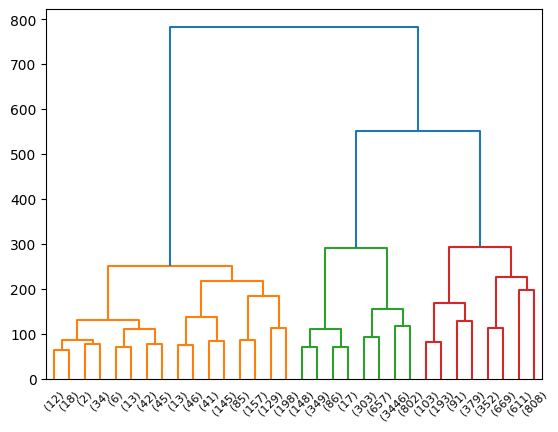

In [ ]:
new_dvt = ratings_user
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(new_dvt)

plot_dendrogram(model, truncate_mode="level", p=4)
#new_dvt.head()


In [ ]:
df = new_dvt
model_new = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(df)
pred = model_new.fit_predict(df)
clus = np.array(pred)
clus = clus.reshape(-1,1)
columns = list(df.columns)

df['Clus'] = clus
df.head()

out = {}
for i in range(3):

  clust = df.loc[df['Clus'] == i]
  print(clust.to_numpy().shape)

  out[i] = clust.drop(['Clus'],axis = 1)

(3206, 726)
(986, 726)
(5808, 726)


In [ ]:
movie_names = list(ratings_user.columns)
print(movie_names)

['301, 302 (301/302) (1995)', '8 Seconds (1994)', 'Above the Rim (1994)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addiction, The (1995)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Age of Innocence, The (1993)', 'Air Up There, The (1994)', 'Airheads (1994)', 'Aladdin (1992)', 'All Dogs Go to Heaven 2 (1996)', 'All Things Fair (Lust och fägring stor) (1995)', 'Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)', 'Amateur (1994)', 'Amazing Panda Adventure, The (1995)', 'American President, The (1995)', 'And Nobody Weeps for Me (Und keiner weint mir nach) (1996)', 'Andre (1994)', 'Angela (1995)', 'Angels and Insects (1995)', 'Angus (1995)', 'Anne Frank Remembered (1995)', 'Another Stakeout (1993)', "Antonia's Line (Antonia) (1995)", 'Apollo 13 (1995)', 'Aristocats, The (1970)', 'Asfour Stah (1990)', 'Assassins (1995)', 'August (1996)', 'Awfully Big Ad

In [ ]:
data_clus = out
print(data_clus)

{0: title   301, 302 (301/302) (1995)  8 Seconds (1994)  Above the Rim (1994)  \
userId                                                                      
4                             0.0               0.0                   0.0   
7                             0.0               0.0                   0.0   
12                            0.0               0.0                   0.0   
18                            0.0               0.0                   0.0   
20                            0.0               0.0                   0.0   
...                           ...               ...                   ...   
11118                         0.0               0.0                   0.0   
11119                         0.0               0.0                   0.0   
11122                         0.0               0.0                   0.0   
11130                         0.0               0.0                   0.0   
11132                         0.0               0.0                   0.

In [ ]:
def user_encode(movie_lis,rating_lis):
  out = np.zeros((725,))
  #print(out.shape)
  for i in range (len(movie_lis)):
    if(movie_lis[i] in movie_names):
      ind = movie_names.index(movie_lis[i])
      out[ind] = rating_lis[i]

  return out

user = user_encode(['2 days in the valley', '8 Seconds (1994)'],[3, 4])

In [ ]:
user.shape

(725,)

In [ ]:
centroid_dict = {}
for i in range(3):
  data = out[i]
  centroid = np.mean(data,axis = 0)
  centroid_dict[i] = np.array(centroid)
  #print(np.array(centroid))

In [ ]:
centroid_dict

{0: array([1.24766064e-03, 7.64192140e-03, 4.52276981e-03, 1.07189644e+00,
        3.67436057e-01, 0.00000000e+00, 3.93169058e-01, 4.36681223e-03,
        1.71397380e-01, 4.32002495e-02, 9.82532751e-03, 7.34560200e-02,
        1.51450405e+00, 2.16781036e-02, 2.33936369e-03, 2.38615097e-02,
        1.85589520e-02, 9.82532751e-03, 3.31253899e-01, 0.00000000e+00,
        1.34123518e-02, 0.00000000e+00, 2.23019339e-02, 1.82470368e-02,
        1.23206488e-02, 2.27698066e-02, 2.74485340e-02, 1.73190892e+00,
        1.66718653e-01, 1.24766064e-03, 5.11540861e-02, 0.00000000e+00,
        1.24766064e-03, 8.42794760e-01, 1.18527760e-02, 1.16968185e-02,
        1.12289457e-02, 1.98378041e-01, 1.35683094e-02, 1.27885215e-02,
        2.99438553e-02, 5.92638802e-02, 3.82096070e-02, 5.72364317e-02,
        1.51512789e+00, 9.15003119e-01, 6.23830318e-04, 2.38615097e-02,
        1.22005614e+00, 5.42732377e-02, 2.40174672e-02, 1.26325639e-01,
        4.99064255e-03, 1.24766064e-02, 6.08234560e-03, 3.836

In [ ]:
def get_data(centroids,user,data_clus,clus_count):
  listi = []
  for i in range(clus_count):
     centroid = centroids[i]
     dist = np.sum((user - centroid)**2)
     listi.append(dist)

  cluster = listi.index(min(listi))

  return data_clus[cluster]

print(get_data(centroid_dict,user,data_clus,3))

title   301, 302 (301/302) (1995)  8 Seconds (1994)  Above the Rim (1994)  \
userId                                                                      
1                             0.0               0.0                   0.0   
3                             0.0               0.0                   0.0   
6                             0.0               0.0                   0.0   
8                             0.0               0.0                   0.0   
9                             0.0               0.0                   0.0   
...                           ...               ...                   ...   
11123                         0.0               0.0                   0.0   
11126                         0.0               0.0                   0.0   
11127                         0.0               0.0                   0.0   
11128                         0.0               0.0                   0.0   
11129                         0.0               0.0                   0.0   

In [ ]:
def return_item_based_recomended(centroids, user, data_clus, clus_count, movie_w : str, n_items = None) -> pd.DataFrame:
    global df_data

    df_tmp = pd.DataFrame(get_data(centroids,user,data_clus,clus_count), columns = movie_names)
    tmp_lst = list(df_tmp.index)
    print(df_data.index)
    print(tmp_lst)
    df_data = df_data.loc[tmp_lst, :]
    movie = df_data[movie_w]
    similar_movies = df_data.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)

    if (n_items == None):
        return similar_movies
    else:
        return similar_movies.iloc[:n_items]

In [ ]:
return_item_based_recomended(centroid_dict,user,data_clus, 3,"8 Seconds (1994)", 3)

Int64Index([     1,      3,      4,      6,      7,      8,      9,     10,
                11,     12,
            ...
            247742, 247745, 247746, 247747, 247748, 247749, 247750, 247751,
            247752, 247753],
           dtype='int64', name='userId', length=223461)
[1, 3, 6, 8, 9, 10, 11, 13, 16, 19, 22, 23, 24, 25, 26, 27, 29, 31, 35, 36, 41, 42, 43, 49, 51, 52, 53, 54, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 73, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 91, 98, 102, 103, 104, 105, 107, 111, 112, 113, 116, 119, 123, 124, 125, 127, 133, 134, 136, 138, 139, 141, 142, 144, 145, 147, 151, 153, 154, 156, 157, 159, 160, 161, 162, 165, 166, 168, 170, 171, 177, 179, 181, 182, 183, 184, 186, 187, 188, 190, 191, 193, 194, 195, 196, 197, 200, 201, 203, 207, 208, 209, 211, 214, 215, 216, 218, 220, 221, 223, 224, 225, 228, 231, 232, 234, 236, 239, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 258, 260, 262, 266, 267, 271, 273, 274, 278, 279, 280, 281, 283, 28

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
8 Seconds (1994)                         1.0
Ace Ventura: Pet Detective (1994)        1.0
Ace Ventura: When Nature Calls (1995)    1.0
dtype: float64